In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data_1=pd.read_pickle('cleaned_df_final.pkl')
data_2=pd.read_csv('textResponses_graded.csv')

In [3]:
len(data_1)-len(data_2)

322

In [4]:
#data_2=data_2.iloc[:1450]
data_2=data_2[['Transaction Id','correctness','answerType']]

In [5]:
data=pd.merge(data_1,data_2,on='Transaction Id')

In [6]:
data.tail()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list,correctness,answerType
7002,1029681,c54a5c28bced19d58961535e46614ad2,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,S112d59de762cb6b27718fd92dc970abc,5/19/16 9:12,8.8,NaN,Comparing Erroneous Collaboration,Erroneous_Comparing_Collaboration,6a,...,1 of 2,"S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...",32.0,2016-05-19 13:12:37.259 UTC,2016-05-19 13:12:37.275 UTC,"[use, the, same, least, common, denominator]",[],[],0,NaN
7003,1029721,57973b31d8c3c6e36d2665f6247f6f8b,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,S112d59de762cb6b27718fd92dc970abc,5/19/16 9:13,6.75,Student1,Comparing Erroneous Collaboration,Erroneous_Comparing_Collaboration,7a,...,1 of 2,"S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...",32.0,2016-05-19 13:13:55.28 UTC,2016-05-19 13:13:55.28 UTC,"[don't, add, the, numerator]",[],[],0,NaN
7004,1029793,1ac1c571e80971e2f51a8839132b807c,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,S112d59de762cb6b27718fd92dc970abc,5/19/16 9:17,13.75,Student1,Comparing Erroneous Collaboration,Erroneous_Comparing_Collaboration,8a,...,1 of 2,"S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...",32.0,2016-05-19 13:17:01.843 UTC,2016-05-19 13:17:01.859 UTC,"[the, larger, denominator, does, not, always, ...",[],[],0,NaN
7005,1030198,e10dce32b913fc822b5df17cb513e16f,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,Sc03f3121c394179d88011f7f77ce420a,5/20/16 8:58,47.5,NaN,Show what you learned A,Assessment_A,5,...,NaN,NaN,236.0,2016-05-20 12:58:53.910 UTC,2016-05-20 12:58:53.911 UTC,"[it, cannot, be, 6/13, FRACTION, because, of, ...","[6, 13]",[/],1,v
7006,1030200,53406cfa5946f9f896abedeb214aaa55,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,Sc03f3121c394179d88011f7f77ce420a,5/20/16 8:59,26.5,NaN,Show what you learned A,Assessment_A,6,...,NaN,NaN,236.0,2016-05-20 12:59:54.615 UTC,2016-05-20 12:59:54.633 UTC,"[32/65, FRACTION, be, smaller, because, it, be...","[32, 65]",[/],1,p


In [7]:
data.columns

Index(['Row', 'Transaction Id', 'Anon Student Id', 'Session Id', 'Time',
       'Duration (sec)', 'Student Response Subtype', 'Level (Assignment)',
       'Level (ProblemSet)', 'Problem Name', 'Problem View',
       'Problem Start Time', 'Step Name', 'Attempt At Step', 'Is Last Attempt',
       'Outcome', 'Selection', 'Input', 'Input.1', 'KC (Default)',
       'KC (Unique-step)', 'School', 'Class', 'CF (Completion History)',
       'CF (Team ID)', 'CF (Team Position)', 'CF (collaborating_sessions)',
       'CF (step_id)', 'CF (tool_event_time)', 'CF (tutor_event_time)',
       'word_list', 'num_list', 'symb_list', 'correctness', 'answerType'],
      dtype='object')

In [8]:
data['Attempt At Step'].value_counts()

1     6712
2      160
3       37
4       36
6       22
5        8
7        7
9        5
10       4
8        4
14       2
23       2
13       2
11       2
12       2
24       1
27       1
Name: Attempt At Step, dtype: int64

In [9]:
data['answerType'].value_counts().index

Index(['p', 'c', 'n', 'u', 'v', 'c '], dtype='object')

In [10]:
for i in range(len(data)):
    if data.answerType[i]=='c ':
        data.answerType[i]='c'

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [12]:
all_words=[]
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    for temp_word in temp_word_list:
        if not (temp_word in all_words):
            all_words.append(temp_word)
               

In [13]:
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'][i]=temp_answer

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data.answer[1]

'i do not know the answer'

In [15]:
select_rows=[]
for i in range(len(data)):
    if data.answerType[i] in ['p','c','n','u','v']:
        select_rows.append(i)
data=data.iloc[select_rows]

In [16]:
data.correctness.value_counts()

1    900
0    548
Name: correctness, dtype: int64

In [17]:
data.answerType.value_counts()

p    888
c    268
n    143
u     75
v     74
Name: answerType, dtype: int64

In [18]:
from nltk.util import ngrams

In [19]:
all_word_comb=[]
data['ngrams']=''
for i in range(len(data)):
    for word_comb in ngrams(data.word_list.iloc[i],3):
        temp_comb=' '
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word+' '
        if not(temp_comb in all_word_comb):
            all_word_comb.append(temp_comb[:-1])



In [21]:
ngram_vector=[]
for i in range(len(data)):
    temp_vector=[]
    for temp_comb in all_word_comb:
        if temp_comb in data.answer.iloc[i]:
            temp_vector.append(1)
        else:
            temp_vector.append(0)
    ngram_vector.append(temp_vector)


In [22]:
len(all_word_comb)

0

In [23]:
word_comb[0]

'a'

In [24]:
f_train = data.iloc[:1399][ 'ngrams'].values

In [25]:
f_train[0]

[('no', 'because', 'you'),
 ('because', 'you', "don't"),
 ('you', "don't", 'change'),
 ("don't", 'change', 'the'),
 ('change', 'the', 'denominator'),
 ('the', 'denominator', 'so'),
 ('denominator', 'so', 'the'),
 ('so', 'the', 'why'),
 ('the', 'why', 'the'),
 ('why', 'the', 'answer'),
 ('the', 'answer', 'be'),
 ('answer', 'be', 'wrong')]

In [26]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],3):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

## find most informative n-gram in each category

In [27]:
data['at_id'] = data['answerType'].factorize()[0]
cat_id_df = data[['at_id', 'answerType']].drop_duplicates().sort_values('at_id').reset_index(drop=True)
at_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['at_id', 'answerType']].values)
data.sample(2)

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (tutor_event_time),word_list,num_list,symb_list,correctness,answerType,answer,ngrams,ngrams_answer,at_id
3583,533658,b49b9a668057439d2dc4f84dd0dddd83,Stu_7a3e9f3708cd72412b44c0cd8fc3d297,S8e44d54342a5dd0abcb4b5e8bfcc91f9,5/16/16 9:31,121,NaN,Show what you know A,Assessment_A,5,...,2016-05-16 13:31:36.838 UTC,"[be, did, the, question, wrong, to, correctly,...","[3, 4]",[/],0,p,be did the question wrong to correctly answer ...,"[(be, did, the), (did, the, question), (the, q...",bedidthe didthequestion thequestionwrong quest...,0
6839,1006230,699c11915bde686392791a8ed63051e3,Stu_f9a6eb587defe123237eac15746e12cd,Sa91b00b1d35f5a6cb74e6dc3bcbbfc51,5/23/16 9:34,183.5,NaN,Show what you learned B,Assessment_B,5,...,2016-05-23 13:34:57.182 UTC,"[the, answer, be, not, right, because, you, ca...","[4, 5, 4, 4, 2, 2]",[/],1,p,the answer be not right because you cannot sub...,"[(the, answer, be), (answer, be, not), (be, no...",theanswerbe answerbenot benotright notrightbec...,0


In [28]:
data['c_id'] = data['correctness'].factorize()[0]
cat_id_df = data[['c_id', 'correctness']].drop_duplicates().sort_values('c_id').reset_index(drop=True)
c_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['c_id', 'correctness']].values)
data.sample(2)

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,word_list,num_list,symb_list,correctness,answerType,answer,ngrams,ngrams_answer,at_id,c_id
5672,840629,92f4999a8a86af31dd47a7a213c81746,Stu_d2306003e59949c5c49e095097f96f38,Sd6f787754502c04a0afe50fb66728f5b,5/2/16 9:51,120.5,NaN,Show what you know B,Assessment_B,5,...,"[no, because, you, have, to, common, denominator]",[],[],1,p,no because you have to common denominator,"[(no, because, you), (because, you, have), (yo...",nobecauseyou becauseyouhave youhaveto havetoco...,0,0
3927,583865,6ccd620127ab71170725d137a61be864,Stu_8aeaac027e3f8a7e306b55de2d424342,S5a9ddb156335383152134d3f7779de49,2/19/16 10:44,38.5,NaN,Show what you know B,Assessment_B,5,...,"[no, because, you, never, add, or, subtract, t...",[],[],1,p,no because you never add or subtract the denom...,"[(no, because, you), (because, you, never), (y...",nobecauseyou becauseyounever youneveradd never...,0,0


In [29]:
from sklearn.feature_selection import chi2

In [30]:
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 5))
features = tfidf.fit_transform(data.answer)
labels = data.at_id

In [31]:
sorted(at_to_id.items())

[(0, 'p'), (1, 'n'), (2, 'c'), (3, 'u'), (4, 'v')]

### answertype

In [34]:
from wordcloud import WordCloud

************************************************************************
# 'p':
--------------------------------------------------------------------
 Most correlated unigrams:
  . section
  . to
  . least
  . fill
  . right
  . 40
  . shade
  . up
  . closer
  . subtract
  . equation
  . 36
  . picture
  . find
  . add
  . in
  . space
  . cut
  . part
  . common
  . more
  . yes
  . know
  . denominator
  . piece
--------------------------------------------------------------------
 Most correlated bigrams:
  . be more
  . bigger piece
  . find the
  . more piece
  . the least
  . because equation
  . it not
  . closer to
  . be correct
  . to find
  . least common
  . be closer
  . be cut
  . number piece
  . 36 fraction
  . be right
  . denominator be
  . piece be
  . add the
  . smaller piece
  . don know
  . common denominator
  . the denominator
  . the piece
  . dont know
--------------------------------------------------------------------
 Most correlated 3-grams:
  . equation a

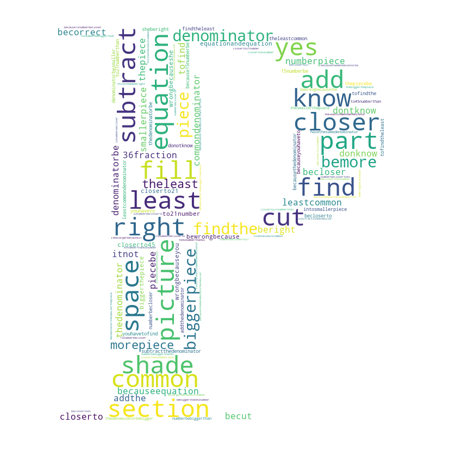

************************************************************************
# 'n':
--------------------------------------------------------------------
 Most correlated unigrams:
  . double
  . draw
  . than
  . hi
  . understand
  . he
  . euyis
  . fraction
  . the
  . denominator
  . think
  . hint
  . sure
  . good
  . logic
  . don
  . faction
  . pay
  . wrong
  . correct
  . right
  . no
  . dont
  . yes
  . know
--------------------------------------------------------------------
 Most correlated bigrams:
  . correct not
  . think she
  . yes think
  . don 13
  . have hint
  . all will
  . it correct
  . be wrong
  . know and
  . because dont
  . it logic
  . draw picture
  . pay faction
  . be none
  . first the
  . be correct
  . he be
  . not sure
  . in correct
  . she be
  . it not
  . not know
  . be right
  . don know
  . dont know
--------------------------------------------------------------------
 Most correlated 3-grams:
  . don 13 fraction
  . not have hint
  . think i

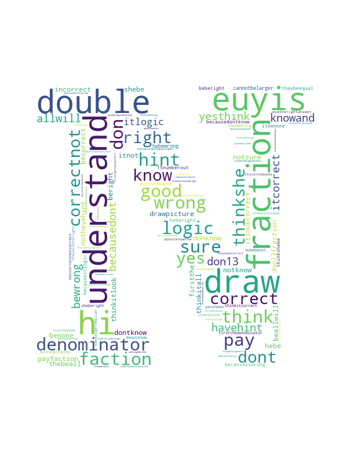

************************************************************************
# 'c':
--------------------------------------------------------------------
 Most correlated unigrams:
  . 24
  . less
  . many
  . 32
  . pie
  . 45
  . 65
  . there
  . 15
  . 21
  . smaller
  . split
  . break
  . she
  . section
  . fill
  . than
  . in
  . into
  . up
  . cut
  . space
  . part
  . more
  . piece
--------------------------------------------------------------------
 Most correlated bigrams:
  . cut up
  . 21 fraction
  . 15 21
  . fill up
  . number whole
  . number part
  . fraction be
  . piece and
  . the bigger
  . piece the
  . up more
  . up into
  . piece than
  . to fill
  . more space
  . more part
  . into smaller
  . be more
  . bigger piece
  . be cut
  . more piece
  . number piece
  . piece be
  . smaller piece
  . the piece
--------------------------------------------------------------------
 Most correlated 3-grams:
  . it be cut
  . be divide into
  . into more piece
  . the b

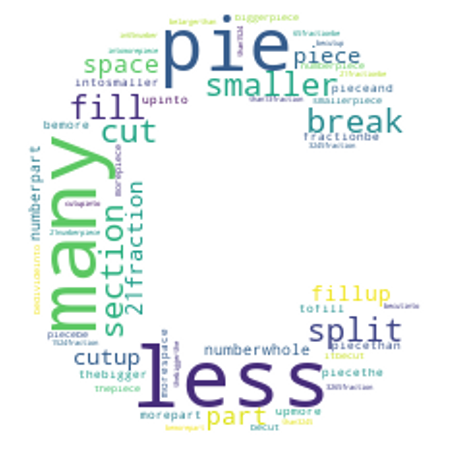

************************************************************************
# 'u':
--------------------------------------------------------------------
 Most correlated unigrams:
  . denominator
  . possible
  . together
  . not
  . seven
  . confuse
  . would
  . equivalent
  . minus
  . fix
  . math
  . his
  . say
  . what
  . operation
  . of
  . equal
  . opposite
  . already
  . finger
  . at
  . any
  . error
  . something
  . follow
--------------------------------------------------------------------
 Most correlated bigrams:
  . go it
  . at the
  . problem different
  . number wrong
  . more of
  . other and
  . different for
  . bigger different
  . think any
  . any of
  . something it
  . fraction equal
  . right but
  . not equivalent
  . say bigger
  . or should
  . should say
  . it also
  . the th
  . bottom be
  . it don
  . equal one
  . she multiply
  . need denominator
  . of something
--------------------------------------------------------------------
 Most correlat

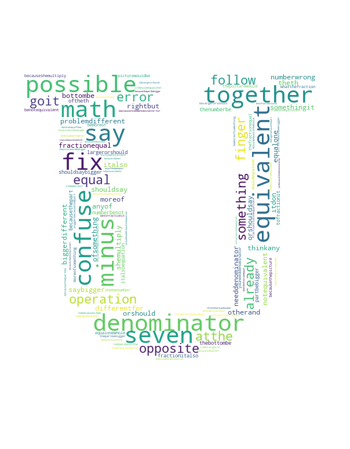

************************************************************************
# 'v':
--------------------------------------------------------------------
 Most correlated unigrams:
  . plot
  . match
  . next
  . correctly
  . complete
  . 14
  . she
  . problem
  . above
  . all
  . help
  . said
  . work
  . shade
  . list
  . should
  . model
  . steps
  . last
  . right
  . explain
  . her
  . count
  . picture
  . show
--------------------------------------------------------------------
 Most correlated bigrams:
  . her numerator
  . thing as
  . shade on
  . be correct
  . as her
  . her model
  . her picture
  . right picture
  . the she
  . be show
  . match the
  . what she
  . she said
  . picture work
  . count the
  . fraction steps
  . the last
  . picture and
  . picture show
  . should it
  . she should
  . the picture
  . the right
  . model show
  . should the
--------------------------------------------------------------------
 Most correlated 3-grams:
  . right because sh

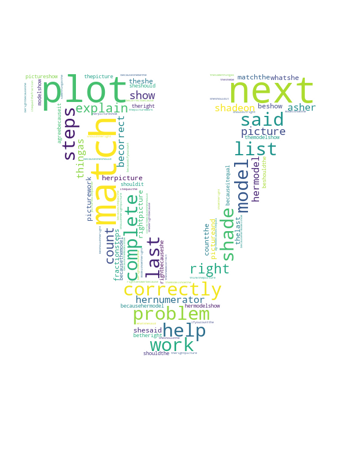

In [35]:
N = 25
for cat, cat_id in sorted(at_to_id.items()):    
    features_chi2 = chi2(features, labels == cat)    
    indices = np.argsort(features_chi2[0])    
    feature_names = np.array(tfidf.get_feature_names())[indices]    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]   
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2] 
    grams_3 = [v for v in feature_names if len(v.split(' ')) == 3] 
    grams_4 = [v for v in feature_names if len(v.split(' ')) == 4] 
    grams_5 = [v for v in feature_names if len(v.split(' ')) == 5] 
    print('************************************************************************')
    print("# '{}':".format(cat_id))
    print('--------------------------------------------------------------------')
    print(" Most correlated unigrams:\n  . {}".format('\n  . '.join(unigrams[-N:])))  
    print('--------------------------------------------------------------------')
    print(" Most correlated bigrams:\n  . {}".format('\n  . '.join(bigrams[-N:])))
    print('--------------------------------------------------------------------')
    print(" Most correlated 3-grams:\n  . {}".format('\n  . '.join(grams_3[-N:])))    
    print('--------------------------------------------------------------------')
    print(" Most correlated 4-grams:\n  . {}".format('\n . '.join(grams_4[-N:])))    
    print('--------------------------------------------------------------------')
    print(" Most correlated 5-grams:\n  . {}".format('\n  . '.join(grams_5[-N:])))   
    select_gram_list.append(unigrams[-N:])
    select_gram_list.append(bigrams[-N:])
    select_gram_list.append(grams_3[-N:])
    select_gram_list.append(grams_4[-N:])
    select_gram_list.append(grams_5[-N:])
    
    temp_wc_text=''
    for temp_gram in unigrams[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
    for temp_gram in bigrams[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
    for temp_gram in grams_3[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' ' 
    for temp_gram in grams_4[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
    for temp_gram in grams_5[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
        
    temp_mask=imageio.imread('mask/'+cat_id+'.jpg')
    wc = WordCloud(background_color="white",width=2000, height=1500, margin=2, mask=temp_mask).generate(temp_wc_text[:-1])
    plt.figure(figsize=(15, 8))
    plt.imshow(wc, interpolation='catrom',vmax=1000)
    plt.axis('off')
    plt.show()

### correctness

************************************************************************
# '1':
--------------------------------------------------------------------
 Most correlated unigrams:
  . section
  . to
  . least
  . fill
  . right
  . 40
  . shade
  . up
  . closer
  . subtract
  . equation
  . 36
  . picture
  . find
  . add
  . in
  . space
  . cut
  . part
  . common
  . more
  . yes
  . know
  . denominator
  . piece
--------------------------------------------------------------------
 Most correlated bigrams:
  . be more
  . bigger piece
  . find the
  . more piece
  . the least
  . because equation
  . it not
  . closer to
  . be correct
  . to find
  . least common
  . be closer
  . be cut
  . number piece
  . 36 fraction
  . be right
  . denominator be
  . piece be
  . add the
  . smaller piece
  . don know
  . common denominator
  . the denominator
  . the piece
  . dont know
--------------------------------------------------------------------
 Most correlated 3-grams:
  . equation a

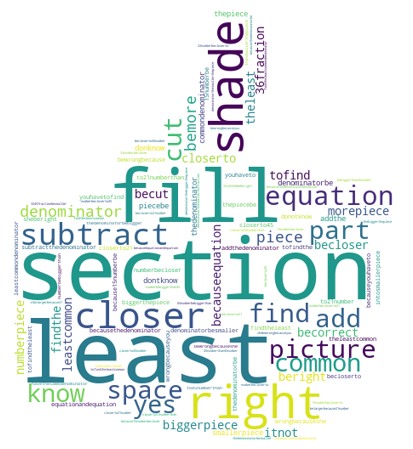

************************************************************************
# '0':
--------------------------------------------------------------------
 Most correlated unigrams:
  . double
  . draw
  . than
  . hi
  . understand
  . he
  . euyis
  . fraction
  . the
  . denominator
  . think
  . hint
  . sure
  . good
  . logic
  . don
  . faction
  . pay
  . wrong
  . correct
  . right
  . no
  . dont
  . yes
  . know
--------------------------------------------------------------------
 Most correlated bigrams:
  . correct not
  . think she
  . yes think
  . don 13
  . have hint
  . all will
  . it correct
  . be wrong
  . know and
  . because dont
  . it logic
  . draw picture
  . pay faction
  . be none
  . first the
  . be correct
  . he be
  . not sure
  . in correct
  . she be
  . it not
  . not know
  . be right
  . don know
  . dont know
--------------------------------------------------------------------
 Most correlated 3-grams:
  . don 13 fraction
  . not have hint
  . think i

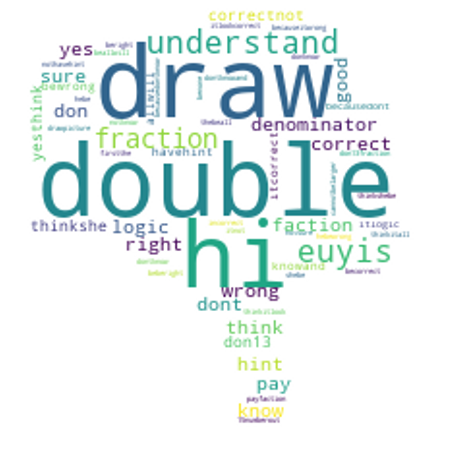

In [36]:
N = 25
for cat, cat_id in sorted(c_to_id.items()):    
    features_chi2 = chi2(features, labels == cat)    
    indices = np.argsort(features_chi2[0])    
    feature_names = np.array(tfidf.get_feature_names())[indices]    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]   
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2] 
    grams_3 = [v for v in feature_names if len(v.split(' ')) == 3] 
    grams_4 = [v for v in feature_names if len(v.split(' ')) == 4] 
    grams_5 = [v for v in feature_names if len(v.split(' ')) == 5] 
    print('************************************************************************')
    print("# '{}':".format(cat_id))
    print('--------------------------------------------------------------------')
    print(" Most correlated unigrams:\n  . {}".format('\n  . '.join(unigrams[-N:])))    
    print('--------------------------------------------------------------------')
    print(" Most correlated bigrams:\n  . {}".format('\n  . '.join(bigrams[-N:])))
    print('--------------------------------------------------------------------')
    print(" Most correlated 3-grams:\n  . {}".format('\n  . '.join(grams_3[-N:])))    
    print('--------------------------------------------------------------------')
    print(" Most correlated 4-grams:\n  . {}".format('\n . '.join(grams_4[-N:])))    
    print('--------------------------------------------------------------------')
    print(" Most correlated 5-grams:\n  . {}".format('\n  . '.join(grams_5[-N:])))    
    select_gram_list.append(unigrams[-N:])
    select_gram_list.append(bigrams[-N:])
    select_gram_list.append(grams_3[-N:])
    select_gram_list.append(grams_4[-N:])
    select_gram_list.append(grams_5[-N:])
    
    temp_wc_text=''
    for temp_gram in unigrams[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
    for temp_gram in bigrams[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
    for temp_gram in grams_3[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' ' 
    for temp_gram in grams_4[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
    for temp_gram in grams_5[-N:]:
        temp_wc_text+=temp_gram.replace(" ", "")+' '
        
    if cat_id==1:
        temp_mask=imageio.imread('mask/good.jpg')
    elif cat_id==0:
        temp_mask=imageio.imread('mask/bad.jpg')
    wc = WordCloud(background_color="white",width=2000, height=1500, margin=2, mask=temp_mask).generate(temp_wc_text[:-1])
    plt.figure(figsize=(15, 8))
    plt.imshow(wc, interpolation='catrom',vmax=1000)
    plt.axis('off')
    plt.show()

In [42]:
error_gram_list=['FRACTION be bigger', 'FRACTION be smaller', 'because FRACTION', 'than FRACTION', 
                'NUMBER greater than', 'NUMBER smaller than', 'because NUMBER',
                'because', 'larger than', 'smaller than','the same', 'FRACTION', 'NUMBER',
                'add the denominator', 'NUMBER out of','add the NUMBER', 'smaller then', 'bigger then',
                'be more than', 'smaller the piece', 'closer to', 'far away', 
                'find', 'then', 'never', 'space','fraction denominator','fraction numerator',
                'be about equal', 'bigger space', 'draw a picture', 'make a whole', 'in fraction',
                'bigger denominator', 'more times', 'as easy','whole number' ,'more part',
                'fraction of', 'if the denominator', 'have smaller part', 'much larger', 'more spaceif']

In [41]:
select_gram_list=select_gram_list+error_gram_list

### vectorize the features from selected (1~5)-gram sequence

In [37]:
temp_list=[]
for temp_grams in select_gram_list:
    for temp_gram in temp_grams:
        if not (temp_gram in temp_list):
            temp_list.append(temp_gram)
select_gram_list=temp_list
len(select_gram_list)

580

In [38]:
data['gram_vector']=''
for i in range(len(data)):
    temp_vector=[]
    for temp_gram in select_gram_list:
        if temp_gram in data.answer.iloc[i]:
            temp_vector.append(data.answer.iloc[i].count(temp_gram))
        else:
            temp_vector.append(0)
    data['gram_vector'].iloc[i]=np.array(temp_vector)
data.sample(3)

D:\anaconda\envs\torch\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,num_list,symb_list,correctness,answerType,answer,ngrams,ngrams_answer,at_id,c_id,gram_vector
3735,556428,c2cedde37001212a43992bb43e7e53b5,Stu_818a2dfc6d6e6a349fd9dde5d6ee1617,Scb07618c8aa67fb42cefad46c33ef1fb,5/23/16 11:26,44,NaN,Show what you learned A,Assessment_A,5,...,"[8, 5]",[],1,p,no because you cannot add 8 NUMBER and 5 NUMBE...,"[(no, because, you), (because, you, cannot), (...",nobecauseyou becauseyoucannot youcannotadd can...,0,0,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
5703,846630,7ad520925369b0fcfd4e430fc21fc8b5,Stu_d2fac53ff0cb27efd51fbd040b8f3106,Sc6ae68c55019c4ada8ba2437b5fdbde3,5/2/16 12:20,12,NaN,Show what you know A,Assessment_A,6,...,[],[],1,p,the denominator be smaller,"[(the, denominator, be), (denominator, be, sma...",thedenominatorbe denominatorbesmaller,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5261,774010,176fc8e0f8d7f321ef55a43596a6c327,Stu_c2a85eca355c0dd201e3048281f4ef1f,Sda5353f747bf9fa1b2800f8f4895301a,5/9/16 10:32,454,NaN,Show what you know B,Assessment_B,5,...,"[14, 18, 7, 3, 4, 14, 18, 14, 18]","[/, +, +, =, /]",0,p,i think the answer be FRACTION because EQUATIO...,"[(i, think, the), (think, the, answer), (the, ...",ithinkthe thinktheanswer theanswerbe answerbeF...,0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [70]:
np.save('select_gram_list.npy',select_gram_list)

# Naive Bayes 

In [39]:
f_train = data.iloc[:1400][ 'gram_vector'].values
c_train = data.iloc[:1400]['correctness'].values
at_train = data.iloc[:1400][ 'answerType'].values
f_test = data.iloc[1401:][ 'gram_vector'].values
c_test = data.iloc[1401:]['correctness'].values
at_test = data.iloc[1401:]['answerType'].values

### correctness

In [40]:
def process_vectors(vectors):
    temp_matrix=[]
    for temp_vecotr in vectors:
        temp_matrix.append(list(temp_vecotr))
    return temp_matrix

In [41]:
train_vectors=process_vectors(f_train)
test_vectors=process_vectors(f_test)

In [42]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with bayes classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with bayes classifier: 0.6808510638297872
f1 score of correctness classification with bayes classifier: 0.7368421052631577


### answer type

In [43]:
clf = MultinomialNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with bayes classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with bayes classifier: 0.7021276595744681


# Bernoulli 

In [44]:
f_train = data.iloc[:1400][ 'gram_vector'].values
c_train = data.iloc[:1400]['correctness'].values
at_train = data.iloc[:1400][ 'answerType'].values
f_test = data.iloc[1401:][ 'gram_vector'].values
c_test = data.iloc[1401:]['correctness'].values
at_test = data.iloc[1401:]['answerType'].values

### correctness

In [45]:
train_vectors=process_vectors(f_train)
test_vectors=process_vectors(f_test)

In [46]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with Bernoulli classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with Bernoulli classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with Bernoulli classifier: 0.723404255319149
f1 score of correctness classification with Bernoulli classifier: 0.7547169811320754


### answer type

In [47]:
clf = BernoulliNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with Bernoulli classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with Bernoulli classifier: 0.6808510638297872


# Logistic Regression 

In [48]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [49]:
f_train = data.iloc[:1400][ 'gram_vector'].values
c_train = data.iloc[:1400]['correctness'].values
at_train = data.iloc[:1400][ 'answerType'].values
f_test = data.iloc[1401:][ 'gram_vector'].values
c_test = data.iloc[1401:]['correctness'].values
at_test = data.iloc[1401:]['answerType'].values

### correctness

In [50]:
train_vectors=process_vectors(f_train)
test_vectors=process_vectors(f_test)

In [51]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with logistic classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with logistic classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with logistic classifier: 0.7446808510638298
f1 score of correctness classification with logistic classifier: 0.7777777777777778


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### answer type

In [52]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with logistic classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of correctness classification with logistic classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with logistic classifier: 0.7021276595744681


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Support vector machine

In [53]:
f_train = data.iloc[:1400][ 'gram_vector'].values
c_train = data.iloc[:1400]['correctness'].values
at_train = data.iloc[:1400][ 'answerType'].values
f_test = data.iloc[1401:][ 'gram_vector'].values
c_test = data.iloc[1401:]['correctness'].values
at_test = data.iloc[1401:]['answerType'].values

### correctness

In [54]:
train_vectors=process_vectors(f_train)
test_vectors=process_vectors(f_test)

In [55]:
clf = LinearSVC().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with svc classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with svc classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with svc classifier: 0.7021276595744681
f1 score of correctness classification with svc classifier: 0.7407407407407407


D:\anaconda\envs\torch\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### answer type

In [56]:
clf = LinearSVC().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with svc classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with svc classifier: 0.6808510638297872


D:\anaconda\envs\torch\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
f_train = data.iloc[:1400][ 'gram_vector'].values
c_train = data.iloc[:1400]['correctness'].values
at_train = data.iloc[:1400][ 'answerType'].values
f_test = data.iloc[1401:][ 'gram_vector'].values
c_test = data.iloc[1401:]['correctness'].values
at_test = data.iloc[1401:]['answerType'].values

### correctness

In [59]:
train_vectors=process_vectors(f_train)
test_vectors=process_vectors(f_test)

In [60]:
clf = DecisionTreeClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.723404255319149
f1 score of correctness classification with decision tree: 0.7547169811320754


### answer type

In [61]:
clf = DecisionTreeClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.6595744680851063


# Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
f_train = data.iloc[:1400][ 'gram_vector'].values
c_train = data.iloc[:1400]['correctness'].values
at_train = data.iloc[:1400][ 'answerType'].values
f_test = data.iloc[1401:][ 'gram_vector'].values
c_test = data.iloc[1401:]['correctness'].values
at_test = data.iloc[1401:]['answerType'].values

### correctness

In [64]:
train_vectors=process_vectors(f_train)
test_vectors=process_vectors(f_test)

In [65]:
clf = RandomForestClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.7872340425531915
f1 score of correctness classification with decision tree: 0.8275862068965517


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### answer type

In [66]:
clf = RandomForestClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.7446808510638298


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
